In [27]:
from fastai.tabular import * 

In [28]:
df = pd.read_csv('../train.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [29]:
df.shape

(200000, 202)

In [30]:
df=df.drop('ID_code',axis=1)

In [31]:
procs = [FillMissing, Categorify, Normalize]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [33]:
valid_idx = range(len(df)-60000, len(df))

In [34]:
dep_var = 'target'

In [35]:
data = TabularDataBunch.from_df('../', df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=[],num_workers=0)

In [36]:
learn = tabular_learner(data, layers=[200,100], emb_szs={}, metrics=accuracy)
#learn.fit_one_cycle(1, 1e-2)

In [37]:
learn.lr_find(stop_div=True,num_it=200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


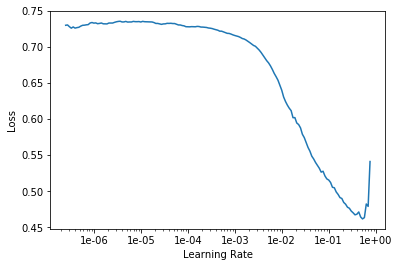

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.240802,0.257383,0.909983,00:31
1,0.235351,0.243132,0.912283,00:33
2,0.222960,0.256433,0.913317,00:33


In [40]:
preds,y,losses = learn.get_preds(with_loss=True)

In [41]:
#from fastai.vision import ClassificationInterpretation

In [42]:
interp =ClassificationInterpretation(learn, preds, y, losses)

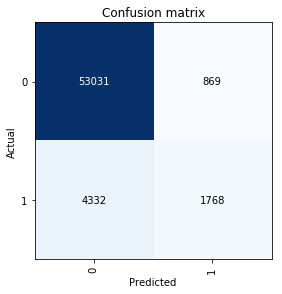

In [43]:
interp.plot_confusion_matrix()

In [44]:
preds_ls=preds.tolist()

In [45]:
y_ls=y.tolist()

In [46]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

In [47]:
y_ls=np.array(y_ls)

In [48]:
y_true=y_ls

In [49]:
y_scores=np.array([item[1] for item in preds_ls])

In [50]:
roc_auc_score(y_true, y_scores)

0.8641549530095198

# After 6 epochs

In [51]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.243979,0.256282,0.906850,00:46
1,0.248327,0.240981,0.911750,00:42
2,0.243508,0.239338,0.913483,00:39


In [52]:
preds,y,losses = learn.get_preds(with_loss=True)

In [ ]:
#from fastai.vision import ClassificationInterpretation

In [53]:
interp =ClassificationInterpretation(learn, preds, y, losses)

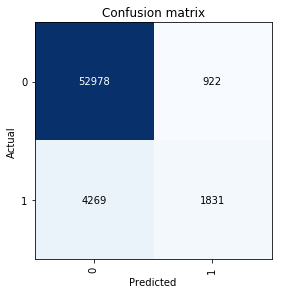

In [54]:
interp.plot_confusion_matrix()

In [55]:
preds_ls=preds.tolist()

In [56]:
y_ls=y.tolist()

In [57]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

In [58]:
y_ls=np.array(y_ls)

In [59]:
y_true=y_ls

In [60]:
y_scores=np.array([item[1] for item in preds_ls])

In [61]:
roc_auc_score(y_true, y_scores)

0.8626720916086256